### `Required Libraries`

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

### `Loading The Data`

In [2]:
df = pd.read_csv('hour.csv')

### `Data Inspection and Preprocessing`

In [3]:
#The first five rows from the data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#The data shape
df.shape

(17379, 17)

In [5]:
#The data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- There are no missing values in the data.
- There are only one object column in the data and the other columns are numerical columns.

In [6]:
#Taking a copy from the data
df_new = df.copy()

In [7]:
#Converting the dteday data type
df_new['dteday'] = pd.to_datetime(df_new['dteday'],format='%Y-%m-%d')
#Getting the day from the dteday
df_new['day'] = df_new['dteday'].dt.day

In [8]:
df_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


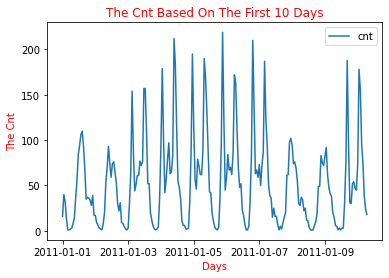

In [9]:
def get_first_ten_days():
    '''
    This function for getting the number of rows for the first ten days in the data set.
    OUTPUT:
    No.of rows for the first ten days.
    '''
    global df_new
    cnt = 0
    for i in df.index:
        if df_new.iloc[i]['mnth'] == 1 and df_new.iloc[i]['yr'] == 0 and df_new.iloc[i]['day'] in range(1,11):
            cnt += 1
        else:
            break
    return cnt

rows_cnt = get_first_ten_days()
#The cnt for the first 10 days
df[:rows_cnt].plot(x = 'dteday',y = 'cnt')
plt.xlabel('Days',color = 'red')
plt.ylabel('The Cnt',color = 'red')
plt.title('The Cnt Based On The First 10 Days',color = 'red')
plt.show()

- It seems that, count of total rental bikes increases or decreases throughout the day.
 

In [10]:
df_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [11]:
#Getting the dummies
df_new = pd.get_dummies(df_new,columns=['season', 'weathersit', 'mnth', 'hr', 'weekday'],drop_first=False)
#Removing useless columns
df_new.drop(columns = ['instant', 'dteday','atemp', 'workingday','day'],axis = 1,inplace = True)

In [12]:
df_new.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#Scaling the features
columns = ['temp','hum','windspeed','cnt','casual','registered']
scaled_features = {}
for col in columns:
    mean,std = df_new[col].mean(),df_new[col].std()
    scaled_features[col] = [mean,std]
    df_new.loc[:,col] = (df_new[col] - mean) / std

In [14]:
df_new.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#Splitting the data for training and testing
#I will use the last 21 days in the data for testing
df_test = df_new[-21*24:]
#Training data
df_train = df_new[:-21*24]

In [16]:
#Selecting the features and targets for training and testing
targets_cols = ['cnt','casual','registered']
features,targets = df_train.drop(targets_cols,axis = 1),df_train[targets_cols]
test_features,test_targets = df_test.drop(targets_cols,axis = 1),df_test[targets_cols]

In [17]:
features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,1,0,-0.088219,0.999178,0.764282,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
16871,1,0,-0.192085,1.310171,0.764282,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
16872,1,0,0.119512,0.740016,0.764282,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
16873,1,0,-0.192085,1.310171,0.519881,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [18]:
targets

,cnt,casual,registered
0,-0.956312,-0.662736,-0.930162
1,-0.823998,-0.561326,-0.804632
2,-0.868103,-0.622172,-0.837666
3,-0.972851,-0.662736,-0.949983
4,-1.039008,-0.723582,-1.009445
...,...,...,...
16870,2.351522,0.047131,2.802727
16871,2.064843,-0.317944,2.578093
16872,1.309554,-0.358507,1.686163
16873,0.609396,-0.459917,0.880124


In [19]:
test_features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
16875,1,0,0.015647,0.999178,0.276298,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
16876,1,0,-0.192085,1.310171,0.519881,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
16877,1,0,-0.192085,0.740016,2.228232,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
16878,1,0,-0.399817,0.429022,2.106440,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
16879,1,0,-0.503683,0.169861,1.130474,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [20]:
test_targets

,cnt,casual,registered
16875,-0.349876,-0.500481,-0.256260
16876,-0.581424,-0.561326,-0.513929
16877,-0.873616,-0.683018,-0.824452
16878,-1.000416,-0.703300,-0.969804
16879,-1.039008,-0.723582,-1.009445
...,...,...,...
17374,-0.388467,-0.500481,-0.302509
17375,-0.553859,-0.561326,-0.480894
17376,-0.548346,-0.581608,-0.467681
17377,-0.708224,-0.459917,-0.698922


In [21]:
#Selecting the last 60 days for validation
train_features,train_targets = features[:-60*24],targets[:-60*24]
val_features,val_targets = features[-60*24:],targets[-60*24:]

In [22]:
train_features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15430,1,0,-0.192085,1.310171,-1.553844,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15431,1,0,-0.192085,1.310171,-0.699669,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15432,1,0,-0.192085,1.310171,-0.821460,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15433,1,0,-0.192085,1.310171,-0.821460,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
train_targets

,cnt,casual,registered
0,-0.956312,-0.662736,-0.930162
1,-0.823998,-0.561326,-0.804632
2,-0.868103,-0.622172,-0.837666
3,-0.972851,-0.662736,-0.949983
4,-1.039008,-0.723582,-1.009445
...,...,...,...
15430,-1.011442,-0.723582,-0.976411
15431,-1.011442,-0.723582,-0.976411
15432,-0.823998,-0.683018,-0.764990
15433,-0.079736,-0.662736,0.120332


In [24]:
val_features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
15435,1,0,0.015647,0.740016,-0.211685,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
15436,1,0,0.223378,-0.141133,0.764282,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
15437,1,0,0.327244,-0.555792,0.886073,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
15438,1,0,0.223378,-0.555792,0.031898,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
15439,1,0,0.223378,-0.348463,0.276298,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,1,0,-0.088219,0.999178,0.764282,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
16871,1,0,-0.192085,1.310171,0.764282,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
16872,1,0,0.119512,0.740016,0.764282,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
16873,1,0,-0.192085,1.310171,0.519881,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [25]:
val_targets

,cnt,casual,registered
15435,3.580933,-0.054279,4.309096
15436,0.973258,-0.013715,1.170827
15437,0.151813,-0.175970,0.239256
15438,0.559779,0.351359,0.556386
15439,1.105571,0.858407,1.045296
...,...,...,...
16870,2.351522,0.047131,2.802727
16871,2.064843,-0.317944,2.578093
16872,1.309554,-0.358507,1.686163
16873,0.609396,-0.459917,0.880124


### `Building The Network`

<li>Building The Sigmoid Function</li>

In [26]:
def sigmoid(z):
    '''
    This function for implementing the sigmoid function.
    INPUT:
    z:vector. The z result.
    OUTPUT:
    The sigmoid result. 
    '''
    return (1 / (1 + np.exp(-z)))

In [42]:
class NeuralNetwork():
    def __init__(self,input_nodes,hidden_nodes,output_nodes,alpha):
        #Setting the number of nodes in input layer, hidden layer and output layer.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        #Setting the learning rate value
        self.alpha = alpha
        #Initializing the weights
        self.weights_input_to_hidden = np.random.normal(0.0,1 / np.sqrt(self.hidden_nodes),(self.hidden_nodes,self.input_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0,1 / np.sqrt(self.output_nodes),(self.output_nodes,self.hidden_nodes))
        #Setting the activation function
        self.activation_function = sigmoid
    def train(self,inputs_lst,targets_lst):
        #Setting the inputs and the targets
        inputs = np.array(inputs_lst,ndmin = 2).T
        targets = np.array(targets_lst,ndmin = 2).T
        #Implementing the forward propagation
        #First layer
        hidden_inputs = np.dot(self.weights_input_to_hidden,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        #Second layer
        final_inputs = np.dot(self.weights_hidden_to_output,hidden_outputs)
        final_outputs = final_inputs
        #Implementing the backpropagation
        #Backpropagated error
        output_error = targets - final_outputs
        hidden_errors = np.dot(self.weights_hidden_to_output.T,output_error)
        hidden_grad = hidden_errors * (hidden_outputs * (1 - hidden_outputs))
        #Updating the weights
        self.weights_hidden_to_output += (self.alpha) * (hidden_outputs.T * output_error)
        self.weights_input_to_hidden += (self.alpha) * (inputs.T * hidden_grad)
    def run(self,input_lst):
        #Setting the inputs
        inputs = np.array(input_lst,ndmin=2).T
        #Implementing the forward propagation
        hidden_inputs = np.dot(self.weights_input_to_hidden,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_to_output,hidden_outputs)
        final_outputs = final_inputs
        return final_outputs

In [54]:
def mse(y_hat,y_actual):
    '''
    This function for calculating the mean squared error.
    INPUT:
    y_hat: matrix. The predicted values.
    y_actual: matrix. The actual values.
    OUTPUT:
    The mean squared error value.
    '''
    return np.mean((y_hat - y_actual)**2)

### `Training The Network`

In [67]:
#Setting the hyperparameters
itrs = 1000
learning_rate = 0.03
hidden_nodes = 15
output_nodes = 1

In [68]:
train_features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [70]:
losses = {'train':[],'validation':[]}
n_inputs = train_features.shape[1]
network = NeuralNetwork(n_inputs,hidden_nodes,output_nodes,learning_rate)
for i in range(itrs):
    batch = np.random.choice(train_features.index,size = 150)
    for record,target in zip(train_features.loc[batch].values,train_targets.loc[batch]['cnt']):
        network.train(record,target)
    #The cost value
    train_loss = mse(network.run(train_features),train_targets['cnt'].values)
    val_loss = mse(network.run(val_features),val_targets['cnt'].values)
    #The results
    sys.stdout.write("\rProgress:"+ str(100 * (i / float(itrs)))[:4] \
                    +"   Training Loss:"+ str(train_loss)[:4] \
                    +"   Validation Loss:"+ str(val_loss)[:4])
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
print('\nTraining Finished')

Progress:99.9   Training Loss:0.06   Validation Loss:0.14
Training Finished


- Awesome results.

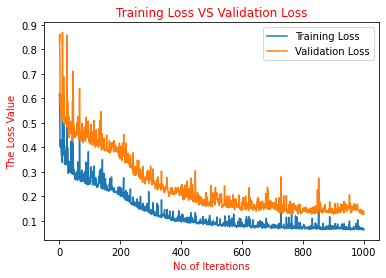

In [74]:
plt.plot(losses['train'],label = 'Training Loss')
plt.plot(losses['validation'],label = 'Validation Loss')
plt.xlabel('No.of Iterations',color = 'red')
plt.ylabel('The Loss Value',color = 'red')
plt.title('Training Loss VS Validation Loss',color = 'red')
plt.legend()
plt.show()

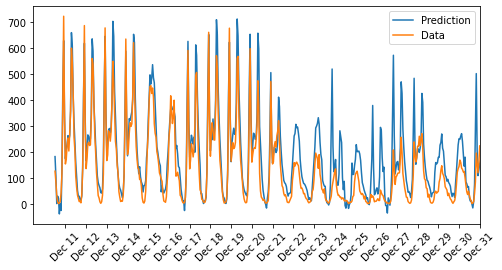

In [102]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(df.loc[test_targets.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

- Awesome results.